[]nx3 => []nx4=> []nx1

Source:
[A neural_network example](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)

In [1]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        
        #
        self.loss       = np.array([])
        

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    def newloss(self):
        self.loss = np.append(self.loss, np.sum(np.square(self.y-self.output)))
        #print(np.sum(np.square(self.y-self.output)))
        
        


#if __name__ == "__main__":
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

for i in range(1500):
    nn.feedforward()
    nn.backprop()
    nn.newloss()

print(nn.output)
print(nn.loss)




[[0.02228784]
 [0.97741052]
 [0.98297999]
 [0.02129723]]
[1.29072995 1.04722425 1.00130353 ... 0.00175362 0.00175195 0.00175029]


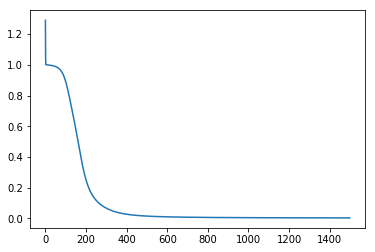

In [3]:
import matplotlib.pyplot as plt
plt.plot(nn.loss)

In [4]:
print(np.square([1,2,3]))

[1 4 9]


In [7]:
print(np.sum(np.square([1,2,3])))

14
